# Clasificadores K means

Los clasificadores REALMENTE implementan modulos, pero estos modulos no se consideran algoritmos, sin embargo, la IA usa mas estadistica mientras que un clasificador si implementa algoritmos.

Veremos un ejemplo respecto a la tipificacion de personas, el algoritmo toma los valores como centros y los empieza a distribuir.

La segmentacion es hacia los mas cercanos

## Aprendizaje automatico (Machine Learning)

K. Means

In [35]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris(as_frame=True)
iris_data = iris.frame
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
# Si hay valores nulos, se pueden rellenar los valores nulos
# eliminarlos si no son necesarios y la muestra es grande
# puedo usar un cuartil para rellenar los valores nulos
# puedo usar la media, moda o mediana para rellenar los valores nulos

# renombrar columnas
iris_data.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    },
    inplace=True,
)

### Analsiis exploratorio

In [37]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [38]:
iris_data["sepal_length"].value_counts()

sepal_length
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64

### Segmentacion tradicional

In [39]:
iris_data.sepal_length.plot(kind="hist");

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [41]:
iris_data.sepal_length.plot(kind="hist", color="red", alpha=0.5)
plt.title("Histograma de longitud de sepalo");
plt.xlabel("Longitudes");

In [42]:
import numpy as np

# Crear segmentos manualmente basados en estándares de longitud
iris_data['Segmento'] = np.where(
    (iris_data['sepal_length'] > iris_data['sepal_length'].mean()) &
    (iris_data['sepal_width'] > iris_data['sepal_width'].mean()) &
    (iris_data['petal_length'] > iris_data['petal_length'].mean()) &
    (iris_data['petal_width'] > iris_data['petal_width'].mean()), 
    'Largo', 
    'Corto'
)

iris_data

,sepal_length,sepal_width,petal_length,petal_width,target,Segmento
0,5.1,3.5,1.4,0.2,0,Corto
1,4.9,3.0,1.4,0.2,0,Corto
2,4.7,3.2,1.3,0.2,0,Corto
3,4.6,3.1,1.5,0.2,0,Corto
4,5.0,3.6,1.4,0.2,0,Corto
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Corto
146,6.3,2.5,5.0,1.9,2,Corto
147,6.5,3.0,5.2,2.0,2,Corto
148,6.2,3.4,5.4,2.3,2,Largo


# Estandarizacion de datos

Vamos a preprocesar los datos para hacerlo de una manera mejor, usando medias estandar

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
columnas_a_escalar = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
# Copiar el dataframe original para escalar
datos_a_escalar = iris_data.copy()

In [46]:
# hace la transformación de los datos y ajuste de las columnas conteniedas -> calculo de la media y desviación estandar
datos_a_escalar[columnas_a_escalar] = scaler.fit_transform(datos_a_escalar[columnas_a_escalar])

In [47]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,target,Segmento
0,5.1,3.5,1.4,0.2,0,Corto
1,4.9,3.0,1.4,0.2,0,Corto
2,4.7,3.2,1.3,0.2,0,Corto
3,4.6,3.1,1.5,0.2,0,Corto
4,5.0,3.6,1.4,0.2,0,Corto
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Corto
146,6.3,2.5,5.0,1.9,2,Corto
147,6.5,3.0,5.2,2.0,2,Corto
148,6.2,3.4,5.4,2.3,2,Largo


In [48]:
datos_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,target,Segmento
0,-0.900681,1.019004,-1.340227,-1.315444,0,Corto
1,-1.143017,-0.131979,-1.340227,-1.315444,0,Corto
2,-1.385353,0.328414,-1.397064,-1.315444,0,Corto
3,-1.506521,0.098217,-1.283389,-1.315444,0,Corto
4,-1.021849,1.249201,-1.340227,-1.315444,0,Corto
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,Corto
146,0.553333,-1.282963,0.705921,0.922303,2,Corto
147,0.795669,-0.131979,0.819596,1.053935,2,Corto
148,0.432165,0.788808,0.933271,1.448832,2,Largo


In [49]:
datos_a_escalar.sepal_length.plot(kind="hist", color="green", alpha=0.5)
plt.title("Histograma de longitud de sepalo estandarizado");
plt.xlabel("Longitudes estandarizadas");

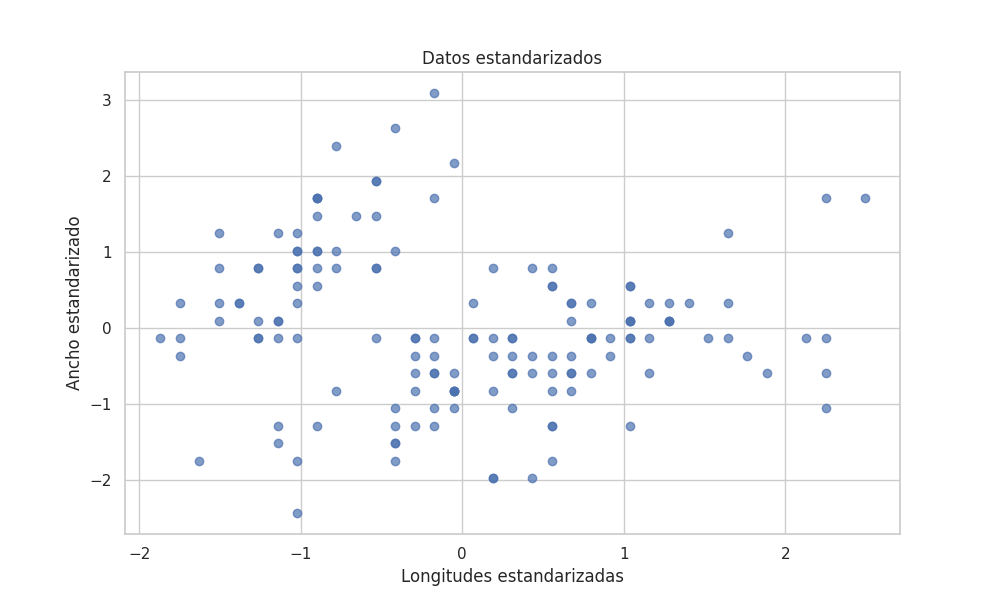

In [50]:
# cluseter columns
columnas_a_segmentar = ["sepal_length", "sepal_width"]

# graficar los datos estandarizados
plt.figure(figsize=(10, 6))
plt.title("Datos estandarizados")
plt.xlabel("Longitudes estandarizadas")
plt.ylabel("Ancho estandarizado")

# graficar los datos estandarizados
plt.scatter(datos_a_escalar[columnas_a_segmentar[0]], datos_a_escalar[columnas_a_segmentar[1]], alpha=0.7)
plt.show()

## AHORA CON EL USO DE K-MEANS

In [51]:
from sklearn.cluster import KMeans

In [52]:
modelo = KMeans(n_clusters=2, random_state=12)

In [53]:
# ejecutamos el modelo
modelo.fit(datos_a_escalar[columnas_a_segmentar])

KMeans(n_clusters=2, random_state=12)

In [54]:
# ahora en una columna segmento-2 vamos a colocar el resultado de la prediccion que hizo k means

datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[columnas_a_segmentar])

In [55]:
datos_a_escalar.Segmento.value_counts()

Segmento
Corto    125
Largo     25
Name: count, dtype: int64

In [56]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    100
0     50
Name: count, dtype: int64

In [57]:
marcadores = ['x','*', '.', '|','_']

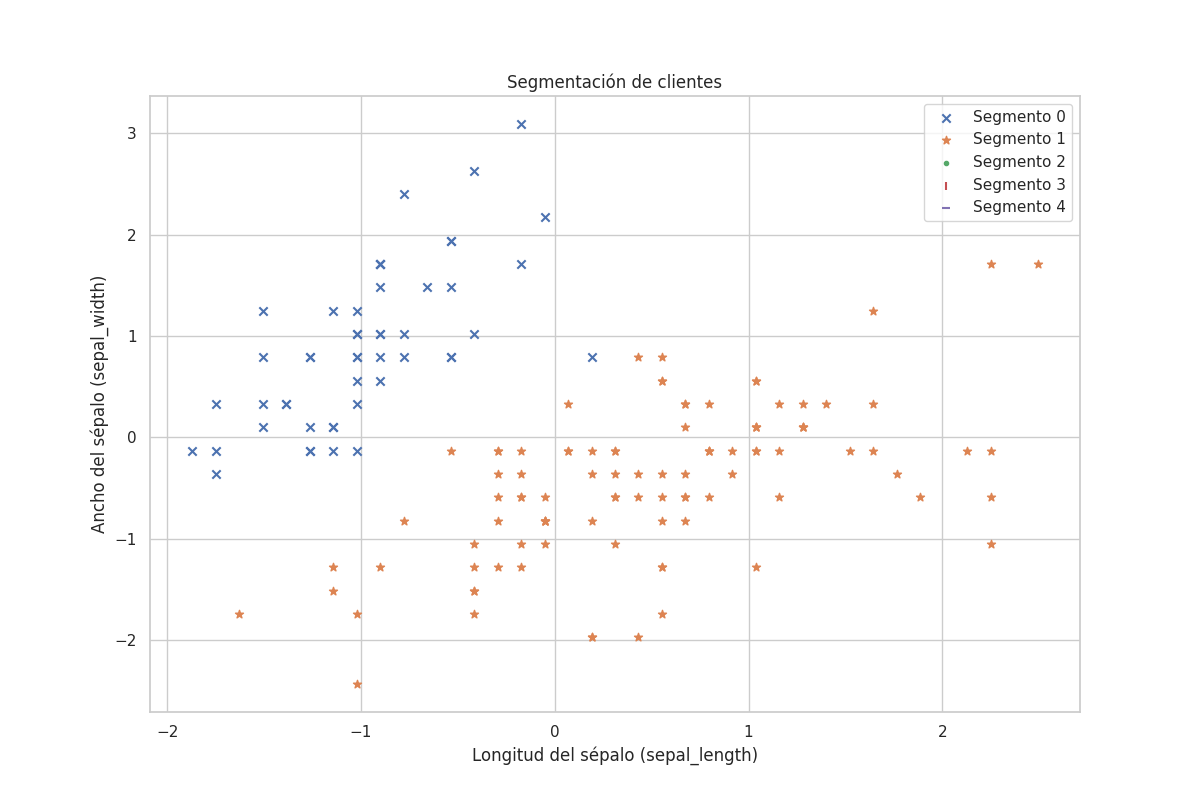

In [58]:
# recorrido segmento a segmento para plotear
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

for segmento in range(5):  # 5 segmentos desde 0 a 4
    dato_segmento_tmp = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(dato_segmento_tmp.sepal_length, dato_segmento_tmp.sepal_width, marker=marcadores[segmento], label=f"Segmento {segmento}")

# pintado
plt.xlabel("Longitud del sépalo (sepal_length)")
plt.ylabel("Ancho del sépalo (sepal_width)")
plt.title("Segmentación de clientes")
plt.legend()
plt.show()

## Usar 2 dimensiones para el modelo

Como podemos usar mas de 2 dimensiones para las graficas, vamos a graficar en base a **columnas_a_escalar**

In [59]:
datos_a_escalar[columnas_a_escalar].head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [60]:
modelo2 = KMeans(n_clusters=3, random_state=17)

In [61]:
modelo2.fit(datos_a_escalar[columnas_a_escalar])

KMeans(n_clusters=3, random_state=17)

In [62]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[columnas_a_escalar])

In [63]:
datos_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,target,Segmento,Segmento2,Segmento3
0,-0.900681,1.019004,-1.340227,-1.315444,0,Corto,0,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,Corto,0,0
2,-1.385353,0.328414,-1.397064,-1.315444,0,Corto,0,0
3,-1.506521,0.098217,-1.283389,-1.315444,0,Corto,0,0
4,-1.021849,1.249201,-1.340227,-1.315444,0,Corto,0,0
...,...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,Corto,1,1
146,0.553333,-1.282963,0.705921,0.922303,2,Corto,1,2
147,0.795669,-0.131979,0.819596,1.053935,2,Corto,1,1
148,0.432165,0.788808,0.933271,1.448832,2,Largo,1,1


In [64]:
from mpl_toolkits import mplot3d

In [65]:
# cuando usamos %matplotlib genera las graficas por defecto "inline", es decir que crea una ventana desde la linea de comandos 
# y el notebook captura lo que la consola devuelve y lo muestra en el output

# ahora probaremos invocar a las graficas desde notebook

%matplotlib widget

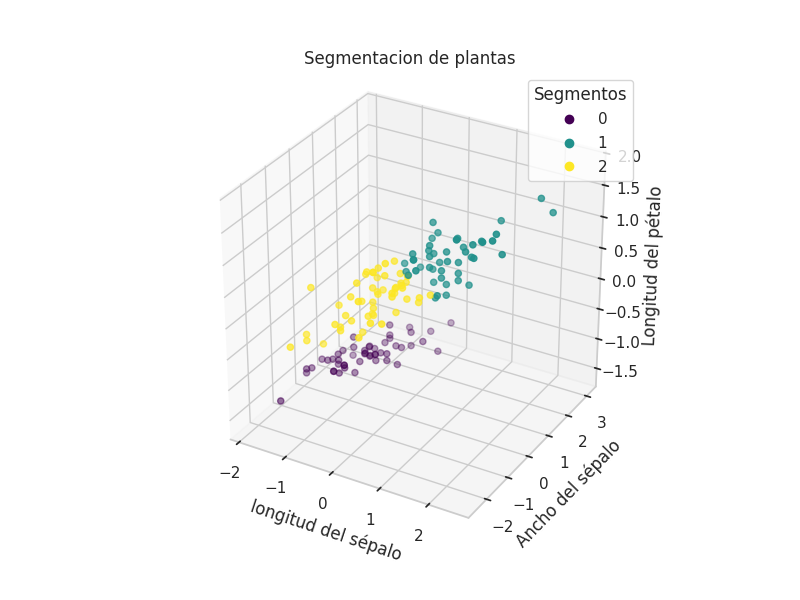

In [66]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")
scatter = ax.scatter3D(
    datos_a_escalar[columnas_a_escalar[0]],
    datos_a_escalar[columnas_a_escalar[1]],
    datos_a_escalar[columnas_a_escalar[2]],
    c=datos_a_escalar["Segmento3"],
    cmap="viridis",
    label="Segmentos",
)

plt.title("Segmentacion de plantas")
plt.xlabel("longitud del sépalo")
plt.ylabel("Ancho del sépalo")
ax.set_zlabel("Longitud del pétalo")
plt.legend(*scatter.legend_elements(), title="Segmentos")

# Ajustar el cuadrado renderizado para ocupar todo el ancho del lienzo
ax.set_box_aspect([1, 1, 1])  # Relación de aspecto 1:1:1

# Mostrar la gráfica
plt.show();


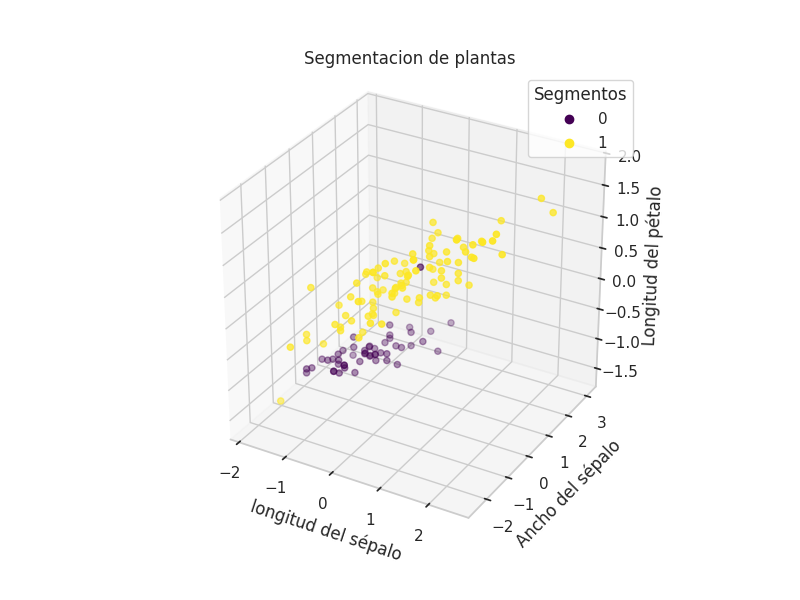

In [67]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")
scatter = ax.scatter3D(
    datos_a_escalar[columnas_a_escalar[0]],
    datos_a_escalar[columnas_a_escalar[1]],
    datos_a_escalar[columnas_a_escalar[2]],
    c=datos_a_escalar["Segmento2"],
    cmap="viridis",
    label="Segmentos",
)

plt.title("Segmentacion de plantas")
plt.xlabel("longitud del sépalo")
plt.ylabel("Ancho del sépalo")
ax.set_zlabel("Longitud del pétalo")
plt.legend(*scatter.legend_elements(), title="Segmentos")

# Ajustar el cuadrado renderizado para ocupar todo el ancho del lienzo
ax.set_box_aspect([1, 1, 1])  # Relación de aspecto 1:1:1

# Mostrar la gráfica
plt.show();


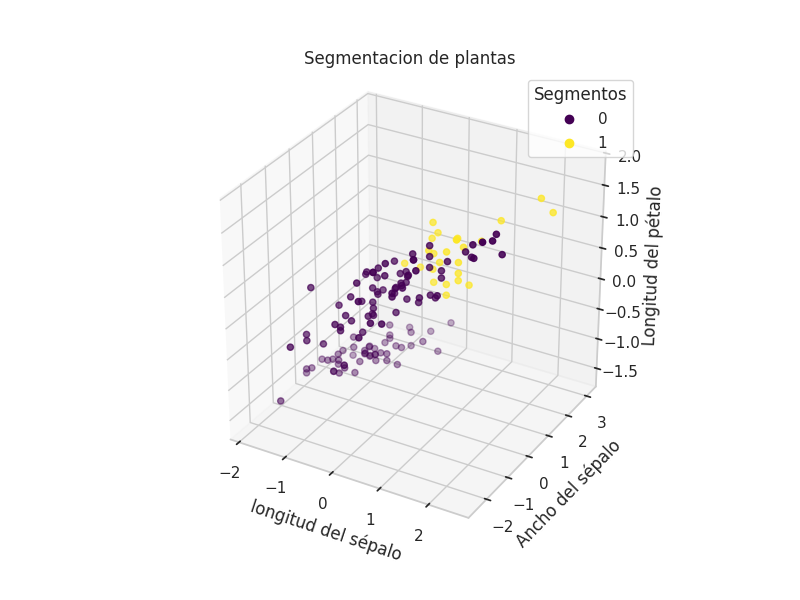

In [68]:
from sklearn.preprocessing import LabelEncoder

# Convertir la columna Segmento a valores numéricos
datos_a_escalar['Segmento_numerico'] = LabelEncoder().fit_transform(datos_a_escalar['Segmento'])

# Graficar con la columna numérica
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")
scatter = ax.scatter3D(
    datos_a_escalar[columnas_a_escalar[0]],
    datos_a_escalar[columnas_a_escalar[1]],
    datos_a_escalar[columnas_a_escalar[2]],
    c=datos_a_escalar["Segmento_numerico"],
    cmap="viridis",
    label="Segmentos",
)

plt.title("Segmentacion de plantas")
plt.xlabel("longitud del sépalo")
plt.ylabel("Ancho del sépalo")
ax.set_zlabel("Longitud del pétalo")
plt.legend(*scatter.legend_elements(), title="Segmentos")

# Ajustar el cuadrado renderizado para ocupar todo el ancho del lienzo
ax.set_box_aspect([1, 1, 1])  # Relación de aspecto 1:1:1

# Mostrar la gráfica
plt.show();
